<a href="https://colab.research.google.com/github/katarinagresova/M7DataSP_2020/blob/main/assignment_02/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data TODOs:
- ~~choose dataset~~
- ~~set way of loading data to this notebook~~  *Erik*

# Preprocessing TODOs:
- ~~check missing values~~ (there are none)
- ~~do one-hot encoding~~ (binned quality into bad and good)
- (optional: more preprocessing (would like to do outlier detection, if there will be time) )
- ~~split label~~
- ~~split train and test~~

# Model training TODOs:
- ~~create normalizer~~
- define neural network
- train neural network
- plot the evolution of loss and/or accuracy as a number of epoch increases

#Evaluating TODOs
- evaluate model on test data

# Data import

---



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [16]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [17]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Note that there is no cathegorical variable so there is no need to onehotencode.

In [18]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


#Data preprocessing

As we can see, all our data is numerical. Let's check, if there are some missing values.

In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We are in luck my friend, there are no missing values. Let's change label - `quality` - in only two categories 'bad' and 'good' it makes it easier for classification. We split the label with median of quality (6) being border withween class labels

In [6]:
wine['quality'] = pd.cut(wine['quality'], bins = [0, 6, 8], labels = ['bad', 'good'])

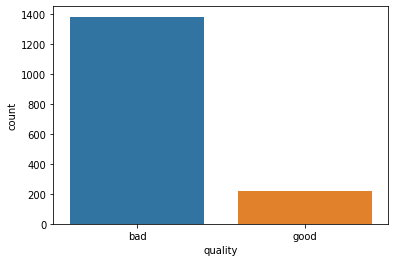

In [25]:
sns.countplot(x='quality', data = wine)

Unbalanced class?

And now some data splitting. First split data into train and test and then separate label column from data.

In [7]:
train_dataset = wine.sample(frac=0.8, random_state=42)
test_dataset = wine.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

label = 'quality'
train_labels = train_features.pop(label)
test_labels = test_features.pop(label)

Print some shapes to see if we did good.

In [8]:
train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((1279, 11), (320, 11), (1279,), (320,))

In order to use Neural network algorithm, we need to standardize the data to zero mean and unit variance.


In [39]:
pipeline = Pipeline(
    [('std_scaler', StandardScaler())]
)
x_train = pipeline.fit_transform(train_features)
x_test = pipeline.fit_transform(test_features)


array([[-0.35592521,  0.18348583, -0.99124445, ..., -0.45482449,
         0.016453  , -0.74610822],
       [-0.29887905, -0.14931262, -0.52157232, ...,  0.51170274,
        -1.07513483, -0.83975462],
       [ 1.35545955,  0.79361632, -0.26064335, ..., -0.19708389,
         1.9570536 , -0.46516902],
       ...,
       [-1.55389454, -1.20317438,  2.66176106, ...,  0.51170274,
        -1.07513483,  0.09670937],
       [-0.47001753,  0.12801942, -0.15627177, ...,  0.89831363,
         0.74417822, -0.83975462],
       [-0.641156  , -0.03837981, -1.04343025, ...,  0.0606567 ,
         0.92610953, -0.74610822]])